# EXPLORATORY DATA ANALYSIS

## Topic: *Student Mental Health*

### Objective
- To compare age and depression 

### Introduction
-> This is a basic EDA to analyze the relationship between age and various mental health issues present. It compares the age of the person and whether age effects mental health.

### Kaggle Link:
This code was taken from kaggle under the name of 'Students Mental Health':

https://www.kaggle.com/datasets/shariful07/student-mental-health

#### Importing different methods

In [3]:
#importing numpy pandas mathplot and other methods

import pandas as pd #is used to manipulate data
import numpy as np #is used for mathematical calculation
import matplotlib.pyplot as plt #is used for data visualization
%matplotlib inline
import seaborn as sns #also used for data visualization

#### Now, Let's read the data file

In [4]:
#reading the data file
df= pd.read_csv('Student Mental Health.csv')

In [5]:
#we can also take a quick look at our data set
df.head()

,Timestamp,Choose your gender,Age,Course,Year of Study,CGPA,Marital status,Depression?,Anxiety?,Panic attack?,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


#### Intepretation
- By default we can look at the fist 5 values by this function but it can be given an index too

In [6]:
#Replacing variable
df.replace({'Yes':0,'No':1,'Male':1,'Female':0}, inplace=True)
df.head()

,Timestamp,Choose your gender,Age,Course,Year of Study,CGPA,Marital status,Depression?,Anxiety?,Panic attack?,Treatment
0,8/7/2020 12:02,0,18.0,Engineering,year 1,3.00 - 3.49,1,0,1,0,1
1,8/7/2020 12:04,1,21.0,Islamic education,year 2,3.00 - 3.49,1,1,0,1,1
2,8/7/2020 12:05,1,19.0,BIT,Year 1,3.00 - 3.49,1,0,0,0,1
3,8/7/2020 12:06,0,22.0,Laws,year 3,3.00 - 3.49,0,0,1,1,1
4,8/7/2020 12:13,1,23.0,Mathemathics,year 4,3.00 - 3.49,1,1,1,1,1


In [7]:
#we use this function to print summary statistics
df.describe()

,Choose your gender,Age,Marital status,Depression?,Anxiety?,Panic attack?,Treatment
count,101.000000,100.00000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.257426,20.53000,0.841584,0.653465,0.663366,0.673267,0.940594
std,0.439397,2.49628,0.366952,0.478239,0.474915,0.471358,0.237562
min,0.000000,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.00000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,23.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,24.00000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Intepretation
- Here different features such as mean, sd, minimum, maximum etc are described

In [9]:
#from this function we get the complete information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           101 non-null    object 
 1   Choose your gender  101 non-null    int64  
 2   Age                 100 non-null    float64
 3   Course              101 non-null    object 
 4   Year of Study       101 non-null    object 
 5   CGPA                101 non-null    object 
 6   Marital status      101 non-null    int64  
 7   Depression?         101 non-null    int64  
 8   Anxiety?            101 non-null    int64  
 9   Panic attack?       101 non-null    int64  
 10  Treatment           101 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 8.8+ KB


#### Intepretation
- This feature allows us to be aware about the different kinds of information in our data set
- We can know the name of the class of our data set
- We also get information about the total range and the total no. of columns
- We can see whether a coloumn is null or not
- We can know the data types used in the data set
- The memory usage of the data set is also specified

In [12]:
#Checking missing values
df.isnull().sum()

Timestamp             0
Choose your gender    0
Age                   1
Course                0
Year of Study         0
CGPA                  0
Marital status        0
Depression?           0
Anxiety?              0
Panic attack?         0
Treatment             0
dtype: int64

In [13]:
#Finding variable missing values
df[df.isna().any(axis=1)]

,Timestamp,Choose your gender,Age,Course,Year of Study,CGPA,Marital status,Depression?,Anxiety?,Panic attack?,Treatment
43,8/7/2020 15:07,1,NaN,BIT,year 1,0 - 1.99,1,1,1,1,1


In [14]:
#Replacing missing value with central tendency
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Age'] = df["Age"].astype(int)
df.iloc[[43]]

,Timestamp,Choose your gender,Age,Course,Year of Study,CGPA,Marital status,Depression?,Anxiety?,Panic attack?,Treatment
43,8/7/2020 15:07,1,20,BIT,year 1,0 - 1.99,1,1,1,1,1


In [15]:
#Checking for the number of unique variables per column.
df.nunique()

Timestamp             92
Choose your gender     2
Age                    7
Course                49
Year of Study          7
CGPA                   6
Marital status         2
Depression?            2
Anxiety?               2
Panic attack?          2
Treatment              2
dtype: int64

In [16]:
#Checking unique variables
df["Year of Study"].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [17]:
#Replacing variables
df['Year of Study'].replace(['year 1','year 2','year 3','year 4'],['Year 1','Year 2','Year 3','Year 4'], inplace=True)
df["Year of Study"].unique()

array(['Year 1', 'Year 2', 'Year 3', 'Year 4'], dtype=object)

In [18]:
#Checking unique variables
df["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [19]:
#Replacing variables
df.replace({'3.50 - 4.00 ':'3.50 - 4.00'},regex=True,inplace=True)
df["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

## Now we can procced with our EDA cycle

### Histogram

In [20]:
#First we check our coloumns
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'Course', 'Year of Study',
       'CGPA', 'Marital status', 'Depression?', 'Anxiety?', 'Panic attack?',
       'Treatment'],
      dtype='object')

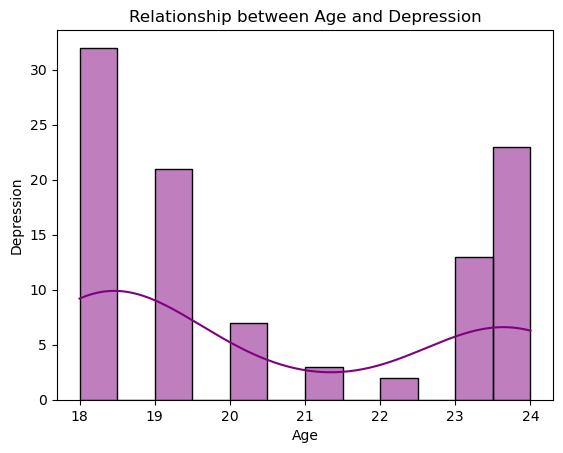

In [23]:
#seaborn histograms
sns.histplot(df['Age'], kde=True,bins=12, color='purple',edgecolor='black')
#adding labels
plt.title('Relationship between Age and Depression')
plt.xlabel('Age')
plt.ylabel('Depression')
plt.show()

### Intepretation
- The above figure shows a histogram of the relationship between year of release and global sales
- By looking at the kde we find this graph to be multi-modal graph
- the max value can be seen at 18 years of age
- the min value can be seen at 22 years of age

## Scatterplot

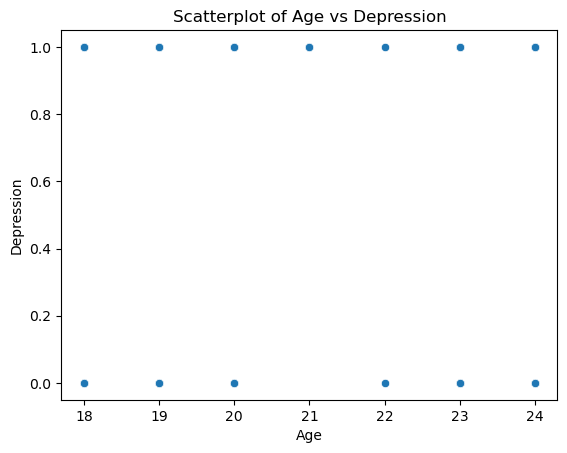

In [26]:
#Creating a scatterplot
sns.scatterplot (x=df['Age'],y=df['Depression?'])

#Optionally add labels and a title
plt.title('Scatterplot of Age vs Depression')
plt.xlabel('Age')
plt.ylabel('Depression')

#Show the plot
plt.show()

### Intepretation
- The above figure is a scatterplot
- The scatterplot shows a collection of data

## Line plot

<Axes: xlabel='Age', ylabel='Depression?'>

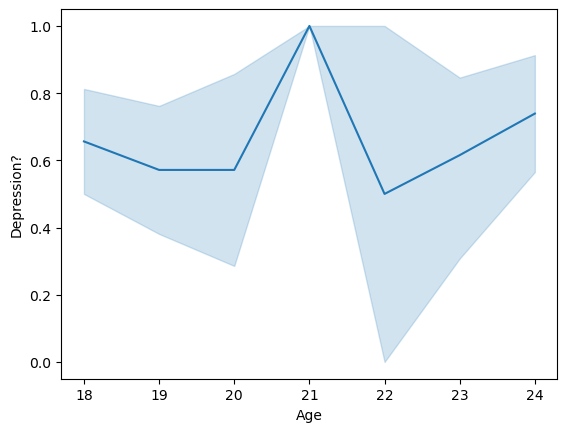

In [29]:
# line plot 
sns.lineplot(x='Age',y='Depression?', data=df )

### Intepretation
- The above figure is a line plot
- From the line plot we can predict the age where most depression cases were seen which is 21

### Box Plot

Text(0.5, 0, 'Depression')

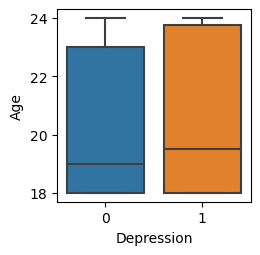

In [35]:
#box plot
plt.figure(figsize=(2.5,2.5))
sns.boxplot(y = 'Age',data= df, x= 'Depression?')
plt.xlabel('Depression')


## Heat Map

C:\Users\Dell\AppData\Local\Temp\ipykernel_14032\1752742378.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


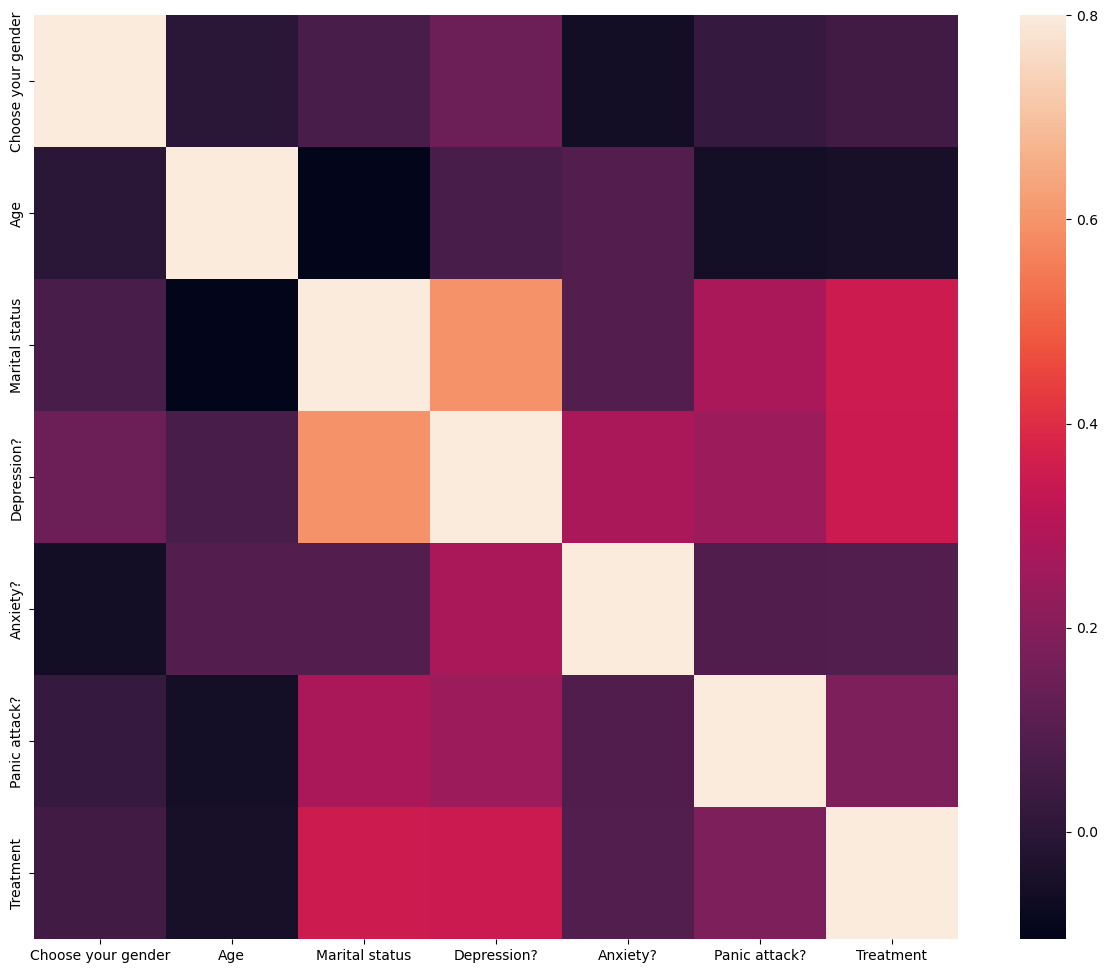

In [36]:
#this is heat map pearson correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

### Intepretation
- The above figure represents a heat map
- Here we can see that age and depression has darker shade which means they have little to no correlation with each other
- they dont necessarily depend on one another
- having depression does not depend on the age of the person

### *From this assignment my objective to find the relationship between age and depression were accomplished. I now know they do not corelate with one another and one dosent have to depend on the other.*


## THE END